<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 1 Some nomenclature

A figure is simple; it is the full canvas you use to draw stuff on. An axis is the individual mathematical axes we use for plotting. So, one figure can have multiple axes, as shown below, where we have a (single) figure with four axes.



![](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_exercise-01_solution.png)

# 2 Comparing the two ‘dialects’

### pyplot Interface

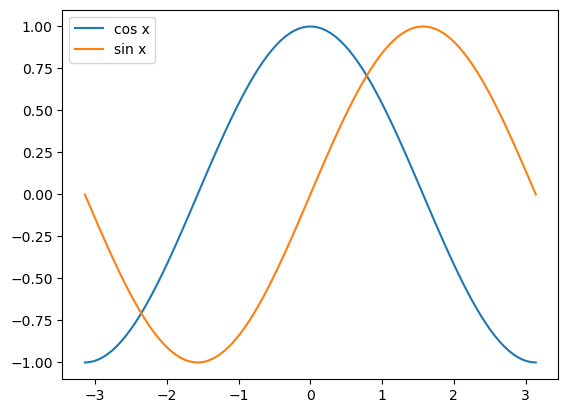

In [13]:
from matplotlib import pyplot as plt
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

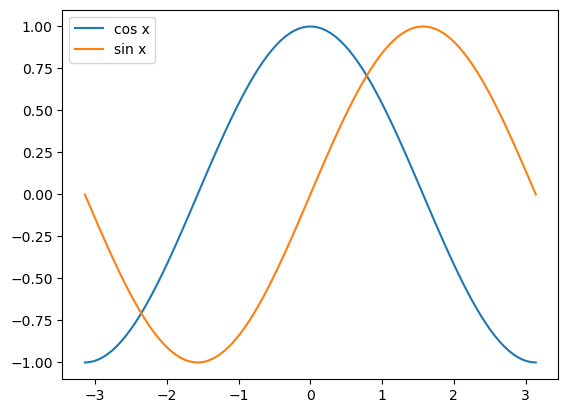

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

# 3 What is OO ax, really?

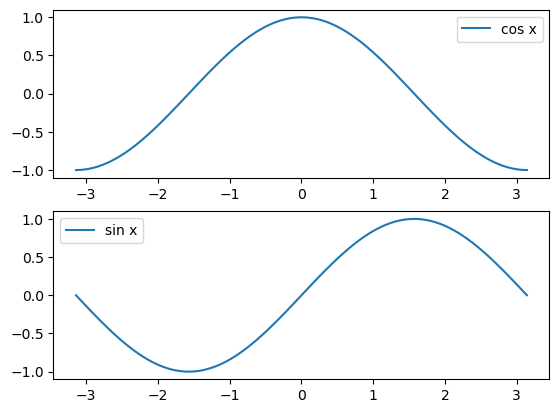

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [19]:
type(ax)

numpy.ndarray

In [20]:
ax.shape

(2,)

In [21]:
type(ax[0])

matplotlib.axes._axes.Axes

# 4 A complete OO example

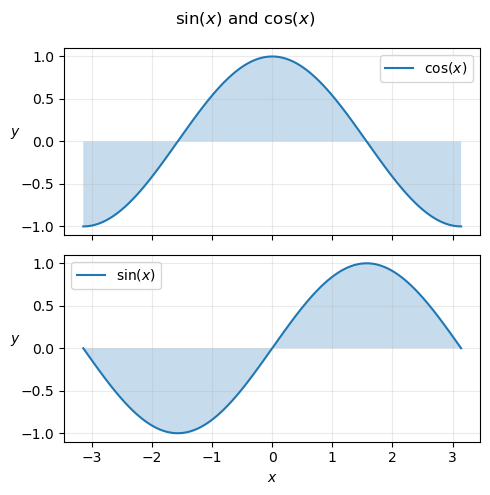

In [4]:
from matplotlib import pyplot as plt
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)   #fill colors between 0 and cos x
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()    #makes the figure looks nicer

# 5 Multiple rows and columns

### Using ax

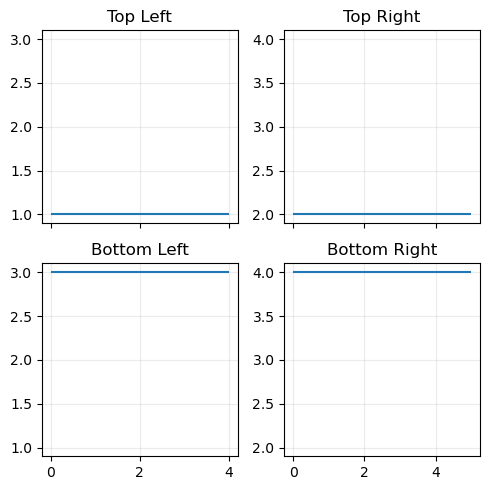

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

In [37]:
ax.shape

(2, 2)

## 5.1 Sharing axes

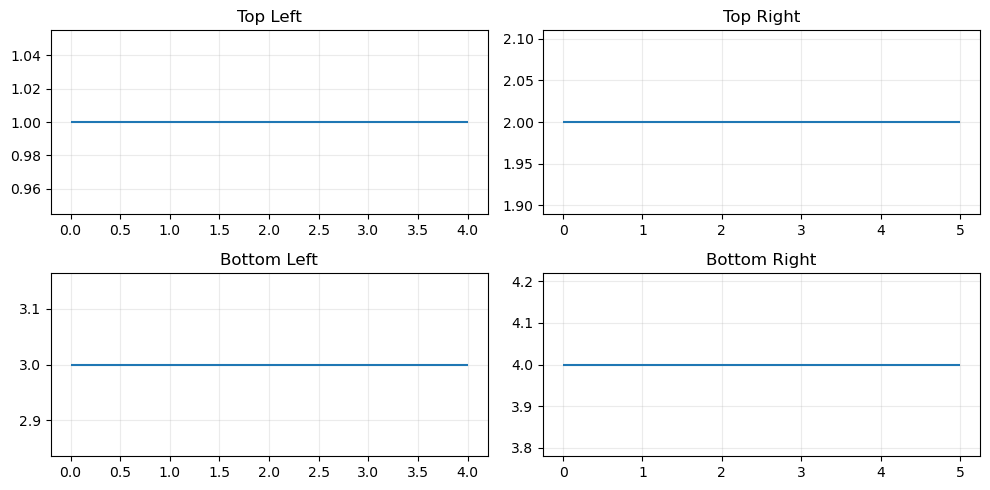

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 5),
                       )

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

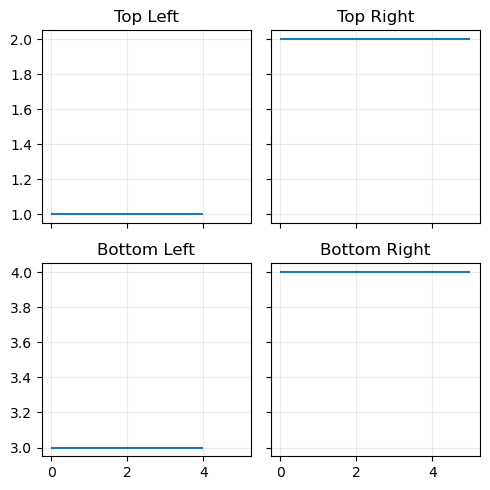

In [56]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)
# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

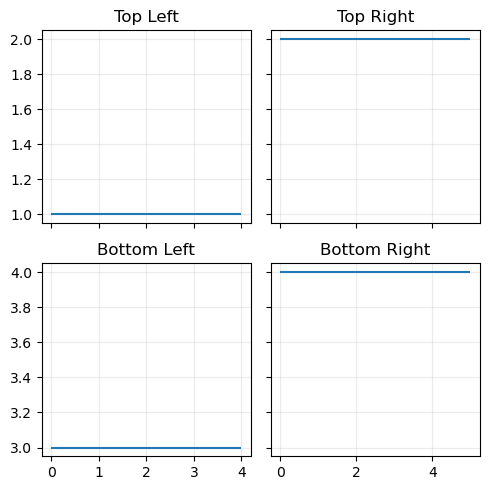

In [57]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)
# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.2 Accessing all axes

In [ ]:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [ ]:
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

### A quick helper function

In [ ]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

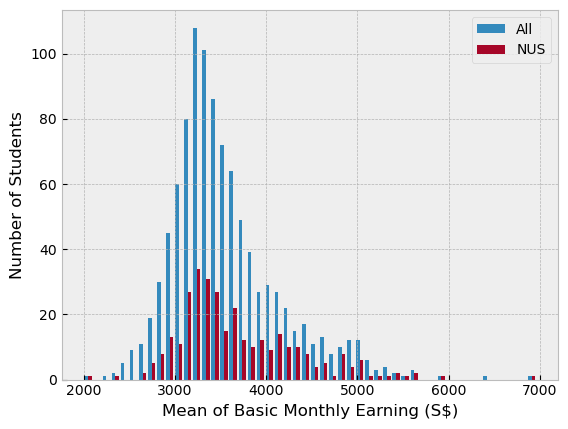

In [60]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Monthly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

In [11]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return dataplt.style.use("ggplot")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Monthly Eraning (S$)')
plt.legend()

NameError: name 'dataplt' is not defined

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

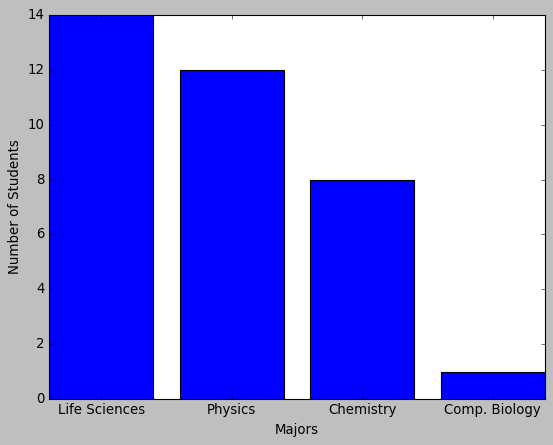

In [9]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('classic')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of Covid cases on each country')

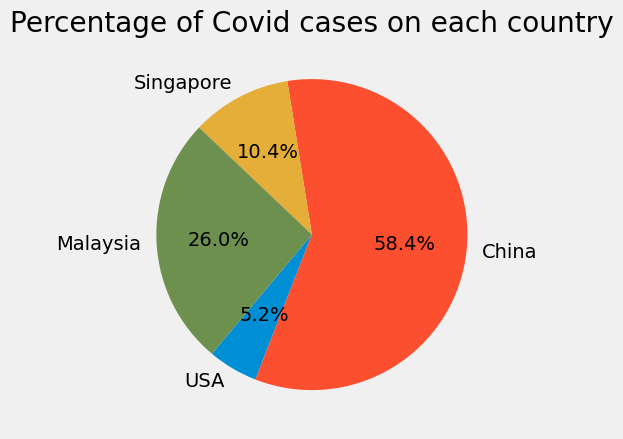

In [8]:
covid_cases = {'USA': 4,
                   'China': 45,
                   'Singapore': 8,
                   'Malaysia': 20}
country = list(student_numbers.keys())
cases = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(cases, 
        labels=country,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=230               
        )
plt.title('Percentage of Covid cases on each country')